In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
import nltk


In [3]:
df = pd.read_csv('Sharktankpitchesdeals.csv')
df

,Season_Epi_code,Pitched_Business_Identifier,Pitched_Business_Desc,Deal_Status,Deal_Shark
0,826,Bridal Buddy,a functional slip worn under a wedding gown th...,1,KOL+LG
1,826,Laid Brand,hair-care products made with pheromones . Laid...,0,NaN
2,826,Rocketbook,a notebook that can scan contents to cloud ser...,0,NaN
3,826,Wine & Design,painting classes with wine served . Wine & Des...,1,KOL
4,824,Peoples Design,a mixing bowl with a built-in scoop . Peoples ...,1,LG
...,...,...,...,...,...
701,101,Ava the Elephant,"(Emmy the Elephant during show, trademarked a...",1,BC
702,101,College Foxes Packing Boxes,a packing and organizing service based on an a...,0,NaN
703,101,Ionic Ear,an implantable Bluetooth device requiring surg...,0,NaN
704,101,Mr. Tod's Pie Factory,a pie company,1,BC+DJ


In [15]:
Pitch_list = []
for i in range(5):
    Pitch_list.append(df['Pitched_Business_Desc'][i])
    print(df['Pitched_Business_Desc'][i],"\n")
    
Pitch_list



a functional slip worn under a wedding gown that allows the wearer to use the restroom on their own . Bridal Buddy is a lightweight slip worn under the gown that lets brides go to the bathroom while wearing it. When nature calls, the bride can bag up her bustle to safely relieve herself without making a mess. 

hair-care products made with pheromones . Laid brand is a Â pheromone-enriched hair care product thatÂ enhances color, in addition to protecting and hydrating hair.Â The pheromones help girls â€œexude confidenceâ€ wherever she goes. 

a notebook that can scan contents to cloud services via an app and can be erased by being microwaved . Rocketbook is an intelligent reusable notebook that allows users to write with a traditional pen and notebook. The notebook is erasable and reusable by allowing users to send notes to the cloud. Simply use a smartphone to send writings to the cloud and a microwave oven to erase for future use. 

painting classes with wine served . Wine & Design p

['a functional slip worn under a wedding gown that allows the wearer to use the restroom on their own . Bridal Buddy is a lightweight slip worn under the gown that lets brides go to the bathroom while wearing it. When nature calls, the bride can bag up her bustle to safely relieve herself without making a mess.',
 'hair-care products made with pheromones . Laid brand is a Â\xa0pheromone-enriched hair care product thatÂ\xa0enhances color, in addition to protecting and hydrating hair.Â\xa0The pheromones help girls â€œexude confidenceâ€\x9d wherever she goes.',
 'a notebook that can scan contents to cloud services via an app and can be erased by being microwaved . Rocketbook is an intelligent reusable notebook that allows users to write with a traditional pen and notebook. The notebook is erasable and reusable by allowing users to send notes to the cloud. Simply use a smartphone to send writings to the cloud and a microwave oven to erase for future use.',
 'painting classes with wine serv

In [4]:
def data_cleaning(corpus):
    letters_only = re.sub("[^a-zA-Z]", " ", corpus) 
    words = letters_only.lower().split()                            
    return( " ".join( words )) 

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2)

In [24]:
train_corpus = []
test_corpus = []
for each in train['Pitched_Business_Desc']:
    train_corpus.append(each)
for each in test['Pitched_Business_Desc']:
    test_corpus.append(each)

from sklearn.feature_extraction.text import CountVectorizer
print(test_corpus)
v = CountVectorizer(ngram_range=(2,2))
train_features = v.fit_transform(train_corpus)
test_features=v.transform(test_corpus)

['mass market versions of custom jewelry mass market versions of custom jewelry', 'a line of one piece rompers for children rags to raches creates a hot line of kids rompers and other fun t shirts and outfits for your kids and you', 'a line of basic men s clothing manufactured in the usa buck mason is an american made clothing line that features clothes that are of a timeless design and really made in america priced less that many high end made elsewhere clothes you find in the mall buck mason in the st century gives you a classic clothing line made entirely in the usa and at a decent price', 'a booth for automated application of sunscreen you seen photo booths but now there is sunscreen booths sunscreen mist allows you to get misted with sunscreen your choice of spf and bug repellent tanning agent or even aloe one less thing to carry with you now when you re at the beach you don t need to stand down wind from that woman who sprays a whole bottle of sunscreen mist', 'a line of accessor

In [12]:
print(train_features.shape)
print(test_features.shape)

(564, 11364)
(142, 11364)


In [13]:

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm 
from sklearn.linear_model import SGDClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix 

In [14]:
Classifiers = {'LR':LogisticRegression(random_state=10,C=5,max_iter=200),
               'DTC':DecisionTreeClassifier(random_state=10,min_samples_leaf=2),
               'RF':RandomForestClassifier(random_state=10,n_estimators=100,n_jobs=-1),
               'GBC':GradientBoostingClassifier(random_state=10,n_estimators=400,learning_rate=0.2),
               'SGD':SGDClassifier(loss="hinge", penalty="l2"),
               'SVM':svm.SVC(kernel='linear', C=0.1),
               'NB':MultinomialNB(alpha=.05)}

In [21]:
def ML_Pipeline(clf_name):
    clf = Classifiers[clf_name]
    fit = clf.fit(train_features,train['Deal_Status'])
    pred = clf.predict(test_features)
    Accuracy = accuracy_score(test['Deal_Status'],pred)
    Confusion_matrix = confusion_matrix(test['Deal_Status'],pred)
    import seaborn as sns
    sns.heatmap(Confusion_matrix,annot=True,fmt='d')
    print('==='*20)
    print('Accuracy = '+str(Accuracy))
    print('==='*20) 
    print(Confusion_matrix)



Accuracy = 0.5070422535211268
[[14 50]
 [20 58]]


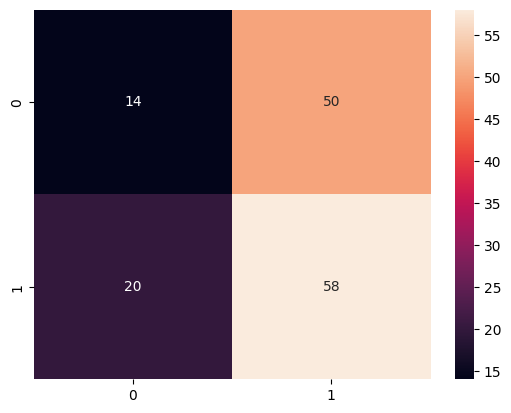

In [22]:
ML_Pipeline('LR')

In [17]:
ML_Pipeline('DTC')

Accuracy = 0.5140845070422535
[[47 17]
 [52 26]]
